In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('gas.json')
print(df.head())

   id_empresa nombre_empresa       tipo_empresa    direccion_empresa  \
0  lid1312602  GAS DON JORGE  Distribuidora GLP         NEPTUNO 1939   
1  lid1312602  GAS DON JORGE  Distribuidora GLP         NEPTUNO 1939   
2  lid1312602  GAS DON JORGE  Distribuidora GLP         NEPTUNO 1939   
3  lid1312603  GAS DON JORGE  Distribuidora GLP  BRISAS DEL RIO 2601   
4  lid1312603  GAS DON JORGE  Distribuidora GLP  BRISAS DEL RIO 2601   

   id_region              nombre_region  id_comuna  nombre_comuna  \
0         13  Metropolitana de Santiago      13126  Quinta Normal   
1         13  Metropolitana de Santiago      13126  Quinta Normal   
2         13  Metropolitana de Santiago      13126  Quinta Normal   
3         13  Metropolitana de Santiago      13126  Quinta Normal   
4         13  Metropolitana de Santiago      13126  Quinta Normal   

            fono_empresa horario_atencion      latitud            longitud  \
0  +56 27739764-27863121         24 Horas   -33,421907  -70,71797179999999

In [4]:
datos_gas = df[['nombre_empresa','nombre_region','nombre_comuna','marca','tipo', 'tamano', 'medida','precio']]
datos_gas

,nombre_empresa,nombre_region,nombre_comuna,marca,tipo,tamano,medida,precio
0,GAS DON JORGE,Metropolitana de Santiago,Quinta Normal,lipigas,normal,11,kg,17000
1,GAS DON JORGE,Metropolitana de Santiago,Quinta Normal,lipigas,normal,15,kg,22900
2,GAS DON JORGE,Metropolitana de Santiago,Quinta Normal,lipigas,normal,45,kg,69500
3,GAS DON JORGE,Metropolitana de Santiago,Quinta Normal,lipigas,normal,11,kg,17000
4,GAS DON JORGE,Metropolitana de Santiago,Quinta Normal,lipigas,normal,15,kg,22900
...,...,...,...,...,...,...,...,...
501,NEO-GAS,Metropolitana de Santiago,Talagante,abastible,catalítico,15,kg,26900
502,NEO-GAS,Metropolitana de Santiago,Talagante,abastible,catalítico,45,kg,79200
503,Urrejola Ltda.,Ñuble,Chillán,lipigas,catalítico,5,kg,13050
504,Urrejola Ltda.,Ñuble,Chillán,lipigas,catalítico,11,kg,22270


In [5]:
# Verificar si hay valores nulos
print(datos_gas.isnull().sum())

nombre_empresa    0
nombre_region     0
nombre_comuna     0
marca             0
tipo              0
tamano            0
medida            0
precio            0
dtype: int64


In [6]:
# Verificar los tipos de datos
print(datos_gas.dtypes)

nombre_empresa    object
nombre_region     object
nombre_comuna     object
marca             object
tipo              object
tamano             int64
medida            object
precio             int64
dtype: object


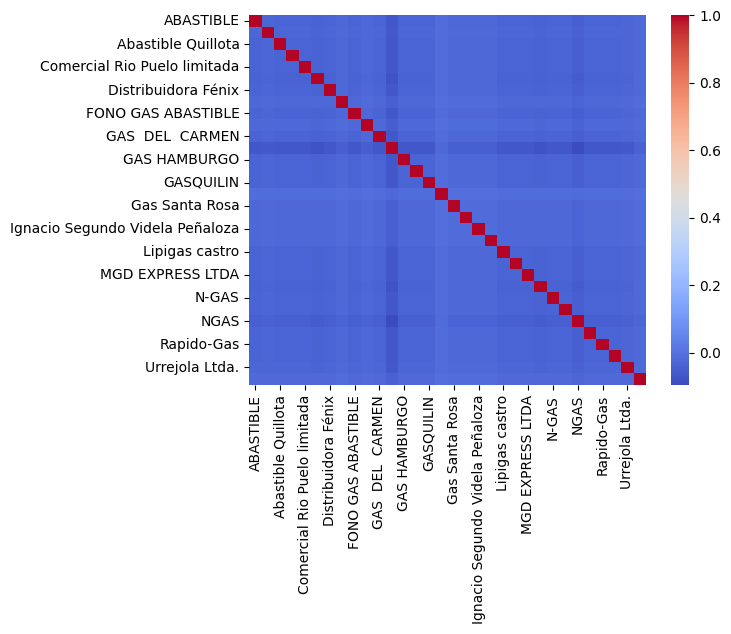

In [12]:
datos_gas_dummy = pd.get_dummies(datos_gas['nombre_empresa'])
sns.heatmap(datos_gas_dummy.corr(), cmap='coolwarm')
plt.show()

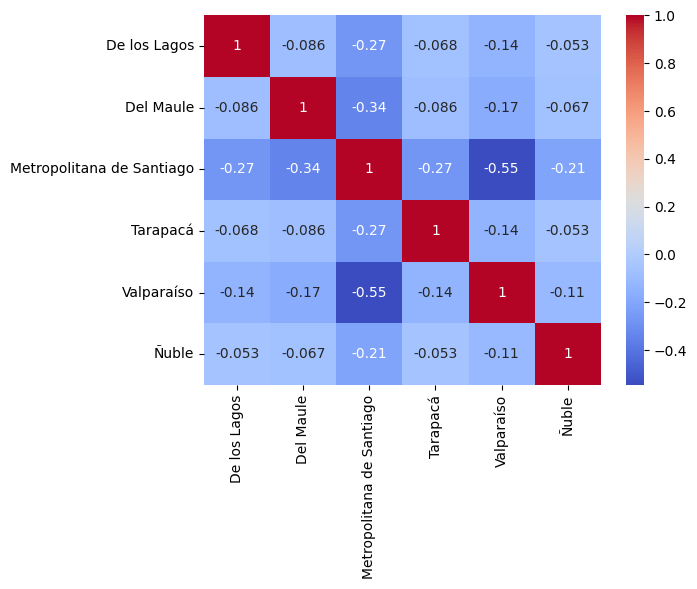

In [13]:
datos_gas_dummy = pd.get_dummies(datos_gas['nombre_region'])
sns.heatmap(datos_gas_dummy.corr(), annot=True, cmap='coolwarm')
plt.show()

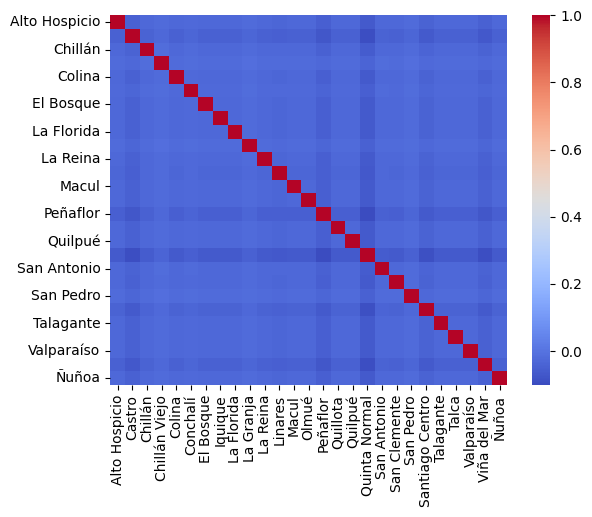

In [14]:
datos_gas_dummy = pd.get_dummies(datos_gas['nombre_comuna'])
sns.heatmap(datos_gas_dummy.corr(), cmap='coolwarm')
plt.show()

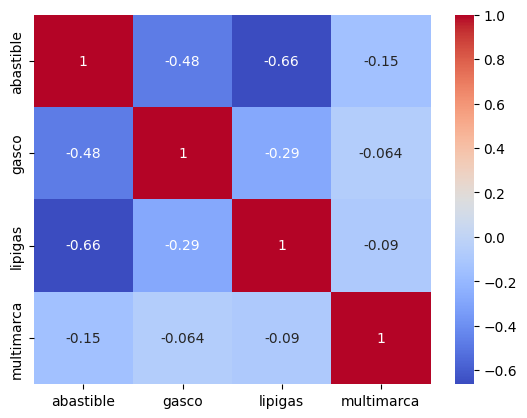

In [15]:
datos_gas_dummy = pd.get_dummies(datos_gas['marca'])
sns.heatmap(datos_gas_dummy.corr(), annot=True, cmap='coolwarm')
plt.show()

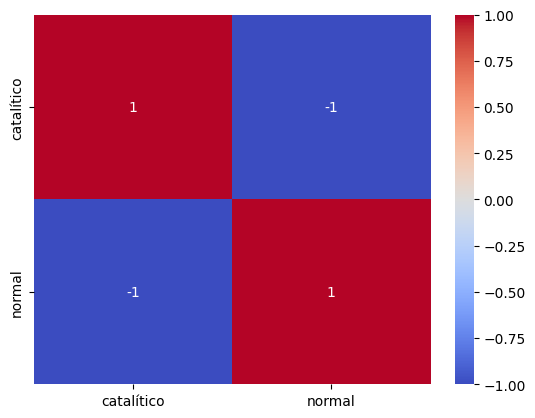

In [65]:
datos_gas_dummy = pd.get_dummies(datos_gas['tipo'])
sns.heatmap(datos_gas_dummy.corr(), annot=True, cmap='coolwarm')
plt.show()

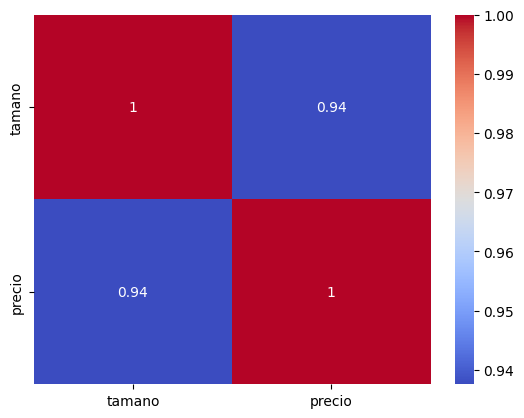

In [ ]:
datos_gas_numericos = datos_gas.select_dtypes(include=['int64', 'float64'])
sns.heatmap(datos_gas_numericos.corr(), annot=True, cmap='coolwarm')
plt.show()

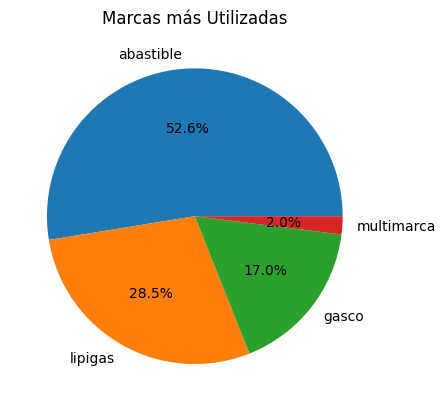

In [8]:
contarMarca = datos_gas['marca'].value_counts()
fig, ax = plt.subplots()
ax.pie(
    contarMarca,
    labels=contarMarca.index,
    autopct='%1.1f%%',
)
plt.title('Marcas más Utilizadas')
plt.show()

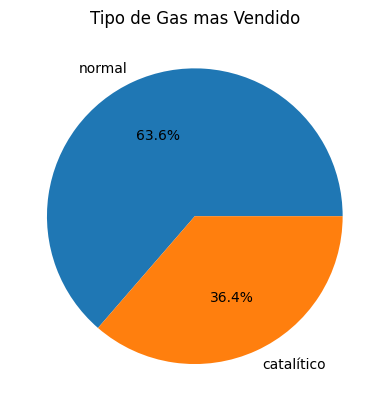

In [8]:
contar_tipo = datos_gas['tipo'].value_counts()

fig, ax = plt.subplots()
ax.pie(
    contar_tipo,
    labels=contar_tipo.index,
    autopct='%1.1f%%',
)
plt.title('Tipo de Gas mas Vendido')
plt.show()

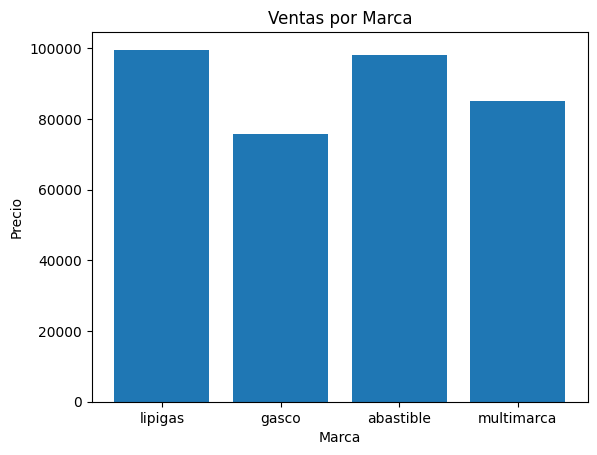

In [7]:
fig, ax = plt.subplots()
ax.bar(datos_gas['marca'], datos_gas['precio'])
plt.ylabel('Precio')
plt.xlabel('Marca')
plt.title('Ventas por Marca')
plt.show()

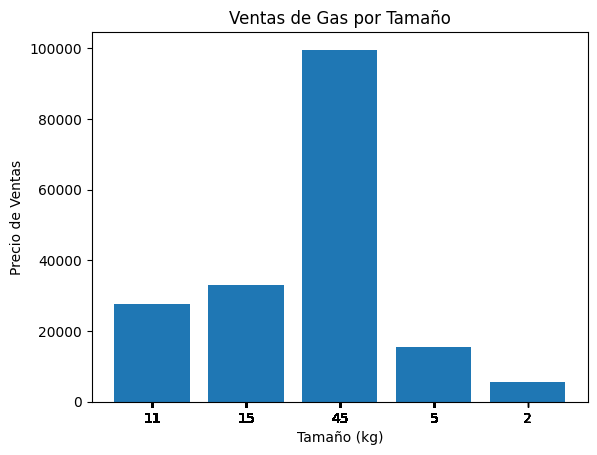

In [22]:
# Crear un mapeo de tamaños a números
tamanos_unicos = datos_gas['tamano'].unique()
tamano_a_numero = {tamano: i for i, tamano in enumerate(tamanos_unicos)}

# Convertir el tamaño en números
tamano_num = datos_gas['tamano'].map(tamano_a_numero)

# Graficar
fig, ax = plt.subplots()
ax.bar(tamano_num, datos_gas['precio'], tick_label=datos_gas['tamano'])
plt.ylabel('Precio de Ventas')
plt.xlabel('Tamaño (kg)')
plt.title('Ventas de Gas por Tamaño')
plt.show()


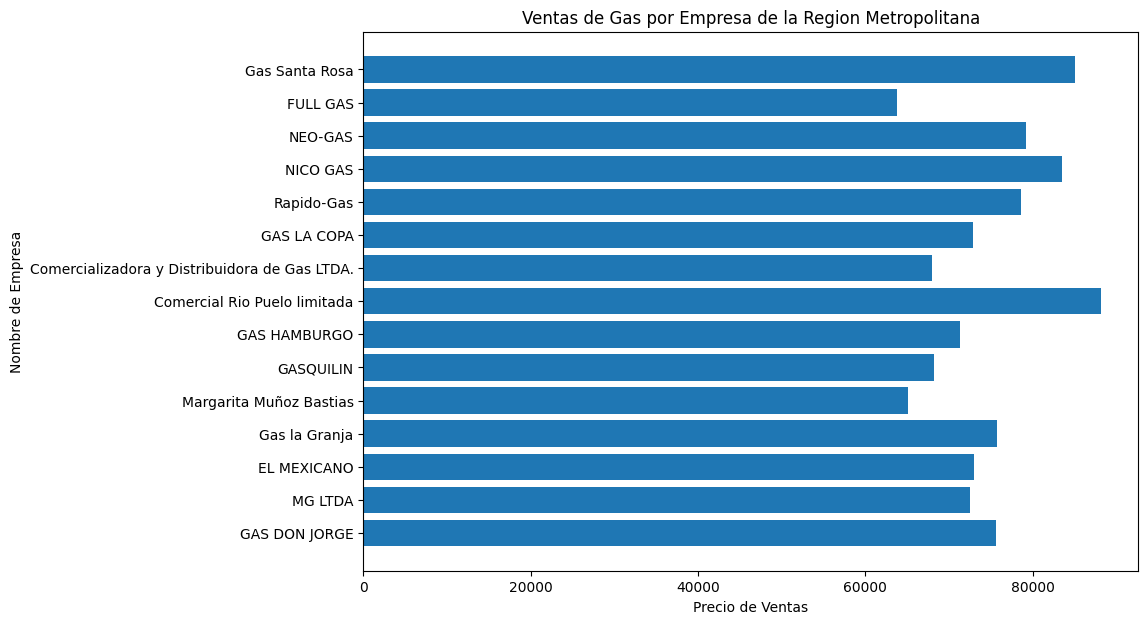

In [10]:
filtro_region = datos_gas[datos_gas['nombre_region'] == 'Metropolitana de Santiago']

fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(filtro_region['nombre_empresa'], filtro_region['precio'],)
plt.ylabel('Nombre de Empresa')
plt.xlabel('Precio de Ventas')
plt.title('Ventas de Gas por Empresa de la Region Metropolitana')
plt.show()

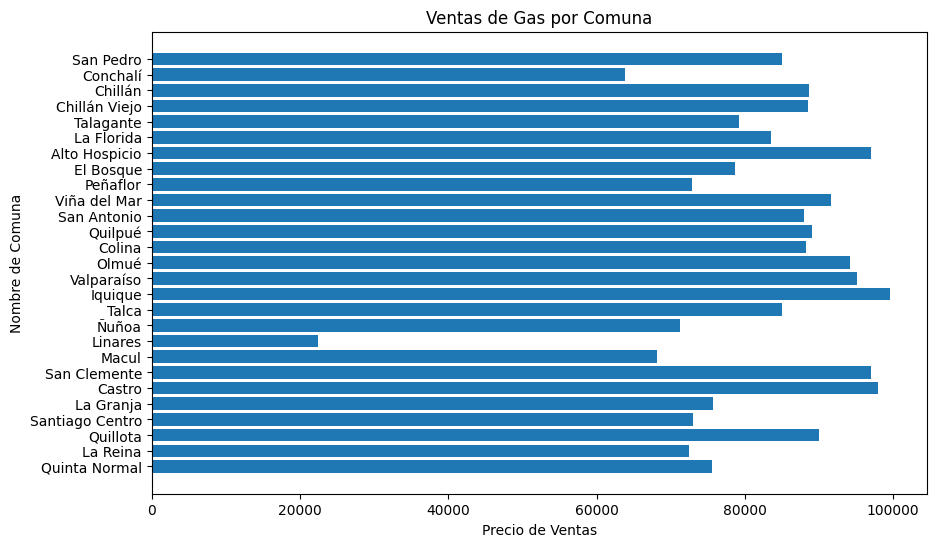

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(datos_gas['nombre_comuna'], datos_gas['precio'],)
plt.ylabel('Nombre de Comuna')
plt.xlabel('Precio de Ventas')
plt.title('Ventas de Gas por Comuna')
plt.show()

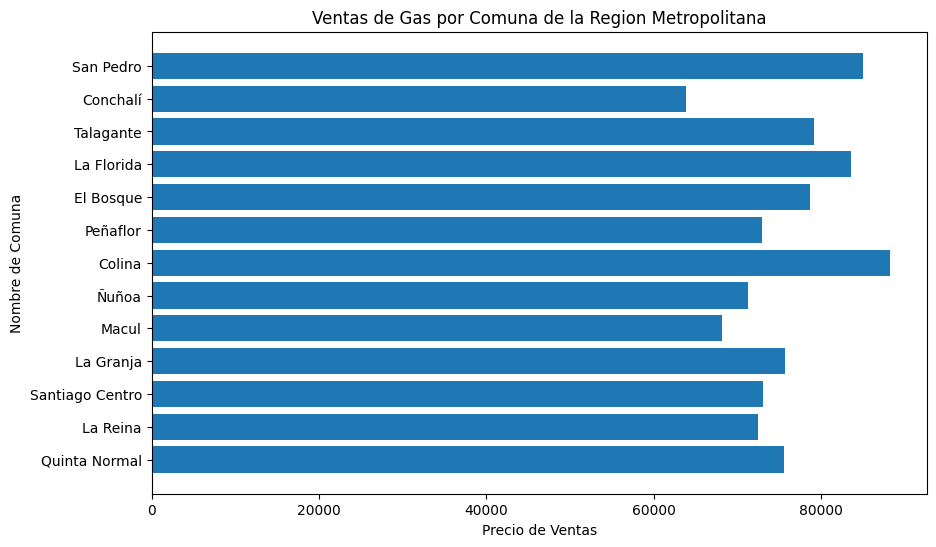

In [8]:
filtro_region = datos_gas[datos_gas['nombre_region'] == 'Metropolitana de Santiago']

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(filtro_region['nombre_comuna'], filtro_region['precio'],)
plt.ylabel('Nombre de Comuna')
plt.xlabel('Precio de Ventas')
plt.title('Ventas de Gas por Comuna de la Region Metropolitana')
plt.show()

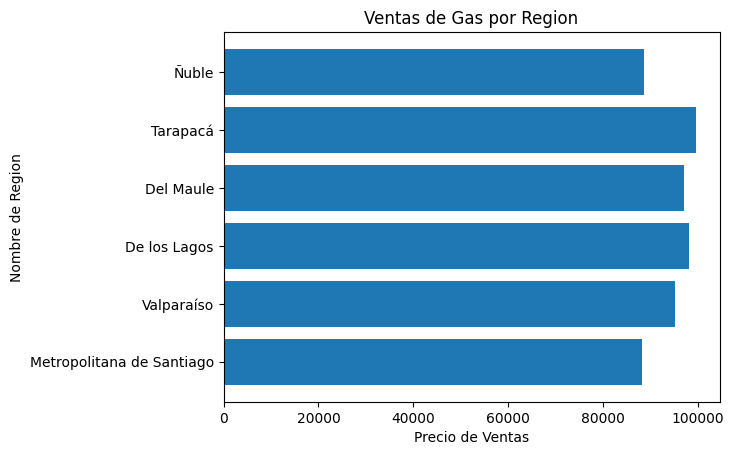

In [14]:
fig, ax = plt.subplots()
ax.barh(datos_gas['nombre_region'], datos_gas['precio'],)
plt.ylabel('Nombre de Region')
plt.xlabel('Precio de Ventas')
plt.title('Ventas de Gas por Region')
plt.show()

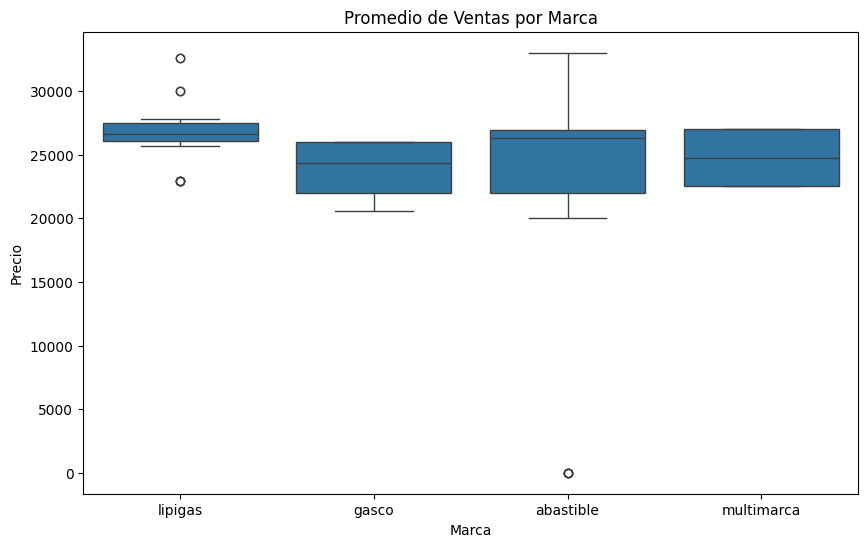

In [29]:
filtro_tamano = datos_gas[datos_gas['tamano'] == 15]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=filtro_tamano['marca'], y=filtro_tamano['precio'])
plt.ylabel('Precio')
plt.xlabel('Marca')
plt.title('Promedio de Ventas por Marca')
plt.show()

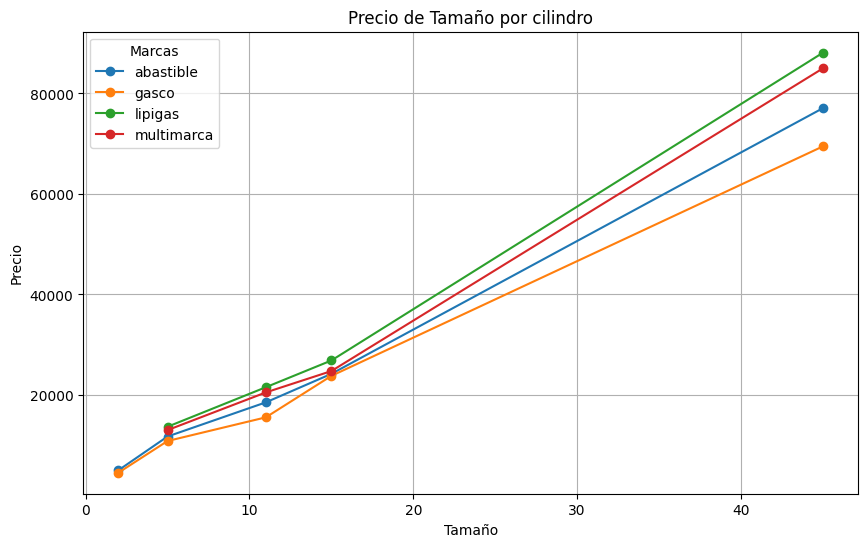

In [67]:
promedioTamanio = datos_gas.groupby(['marca','tamano'])['precio'].mean().unstack('marca')

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(promedioTamanio.index, promedioTamanio, marker='o', label=promedioTamanio.columns.tolist())
plt.ylabel('Precio')
plt.xlabel('Tamaño')
plt.title('Precio de Tamaño por cilindro')
ax.legend(title="Marcas")
plt.grid(True)